- Reconocimiento de Patrones MP-6122
- Investigacion Corta 2
- Fernando Paris Kikut

# Dataset description

The HTRU2 Data Set [1] is used to predict if a celestial body can be categorized as a "Pulsar Star" by describing four features based on the folded profile (integrated pulse profile) and 4 ohter features related to the sensitivity of observation of the celestial body under analysis.

A Pulsar Star is a rare type of Neutron star characterized by its radio emissions which are detectable on Earth. They are important on scientific studies related to space-time, and states of matter among others.

The prediction result is shown on the "target_class" column, where 0 means no Puslar star (negative) and 1 mean Pulsar Star (positive).

### Reference
[1] R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656

- https://archive.ics.uci.edu/ml/datasets/HTRU2
- http://www.jb.man.ac.uk/distance/frontiers/pulsars/section4.html

Import initial required libs

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [281]:
dataset = pd.read_csv('Datasets/pulsar_stars.csv')
dataset.shape

(17898, 9)

# EDA

In [282]:
# Display dataset for intial analysis
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [283]:
dataset.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


Conclusions obtained from initial analysis:
 - All description variables (features candidates) are represented as numerical values
 - No mapping nor data replacement is needed
 - As mentioned on the "Dataset Description section" the description variables are dived in two:
  - 4 based on the integrated pulse profile (Mean of the integrated profile, Standard deviation of the integrated profile, Excess kurtosis of the integrated profile and Skewness of the integrated profile)
  - 4 based on the Dispersion Measure Signal to Noise Ratio (Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess kurtosis of the DM-SNR curve and Skewness of the DM-SNR curve)

In [284]:
# Check if futher clean-up is needed
dataset.isnull().values.any()

False

# Testing and Training Data

In [285]:
# Required lib imports
from sklearn.model_selection import train_test_split

In [286]:
# Integrated-pulse-profile based variables
intgtPlse_inputs = dataset[[' Mean of the integrated profile',
                            ' Standard deviation of the integrated profile',
                            ' Excess kurtosis of the integrated profile',
                            ' Skewness of the integrated profile']]

intgtPlse_inputs.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile
0,140.562500,55.683782,-0.234571,-0.699648
1,102.507812,58.882430,0.465318,-0.515088
2,103.015625,39.341649,0.323328,1.051164
3,136.750000,57.178449,-0.068415,-0.636238
4,88.726562,40.672225,0.600866,1.123492


In [287]:
# DM-SNR based variables
dmSnr_inputs = dataset[[' Mean of the DM-SNR curve',
                        ' Standard deviation of the DM-SNR curve',
                        ' Excess kurtosis of the DM-SNR curve',
                        ' Skewness of the DM-SNR curve']]

dmSnr_inputs.head()

,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,3.199833,19.110426,7.975532,74.242225
1,1.677258,14.860146,10.576487,127.393580
2,3.121237,21.744669,7.735822,63.171909
3,3.642977,20.959280,6.896499,53.593661
4,1.178930,11.468720,14.269573,252.567306


In [288]:
# all inputs
all_inputs = dataset[[' Mean of the integrated profile',
                      ' Standard deviation of the integrated profile',
                      ' Excess kurtosis of the integrated profile',
                      ' Skewness of the integrated profile',
                      ' Mean of the DM-SNR curve',
                      ' Standard deviation of the DM-SNR curve',
                      ' Excess kurtosis of the DM-SNR curve',
                      ' Skewness of the DM-SNR curve']]

all_inputs.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [289]:
# Define inputs(features) and output(labels)

#features = intgtPlse_inputs               # just using integrated pulse related inputs
#features = dmSnr_inputs                    # just using dm-snr related inputs
features = all_inputs                     # using both integrated pulse and dm-snr related inputs

labels = dataset[['target_class']]

# Create training and testing data sets using default ratio (training ~75%, test ~25%)
X_train, X_test, y_train, y_test = train_test_split(features, labels.values.ravel(), random_state=100)

# Supervised Classification

## Decision Tree Classifier 

- Learning Methodology based on conditional (if/else) blocks.
- Easy to graphically interpret models
- Provides mechanisms to prevent overfitting (max_depth, etc)

In [290]:
# Required lib imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from subprocess import call

In [291]:
# Create Decision Tree Model
DecisionTreeModel = DecisionTreeClassifier(max_depth=4)

# Train model
DecisionTreeModel.fit(X_train,y_train)

# Get test set accuracy on trained model
print("Test set accuracy = {}".format(DecisionTreeModel.score(X_test, y_test)))

Test set accuracy = 0.9812290502793296


In [292]:
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not Pulsar','Pulsar'],filled=True)
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'])

0

<img src='simple_tree.png' width = 1000px>

In [293]:
# Input importance analysis
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':DecisionTreeModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head()

,importance
feature,
Excess kurtosis of the integrated profile,0.952439
Standard deviation of the DM-SNR curve,0.029807
Standard deviation of the integrated profile,0.007968
Mean of the integrated profile,0.006646
Skewness of the integrated profile,0.001795


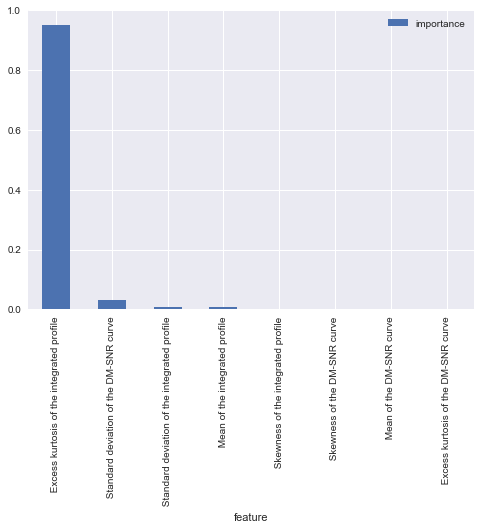

In [294]:
plt.style.use('seaborn')
importances.plot.bar()

Is interesting how the "Excess kurtosis of the integrated profile" feature has a very high importance level in comparision to the others. Let's repeat the analysis using just this input.

In [295]:
# Excess kurtosis of the integrated profile input
important_intgtPlse_inputs = dataset[[' Excess kurtosis of the integrated profile']]

# update features and lables arrays
features = important_intgtPlse_inputs
labels = dataset[['target_class']]

# Create training and testing data sets using default ratio (training ~75%, test ~25%)
X_train_, X_test_, y_train_, y_test_ = train_test_split(features, labels.values.ravel(), random_state=100)

# Train model
DecisionTreeModel.fit(X_train_, y_train_)

# Get test set accuracy on trained model
print("Test set accuracy = {}".format(DecisionTreeModel.score(X_test_, y_test_)))

# reset features array
features = all_inputs

Test set accuracy = 0.9781005586592179


- The obtained accuracy is still very high even when using just one of the features available on the dataset

## Random Forest Classifier

- Combines multiple machine learning models
- Compound of a decision tree collection
- Reduce overfitting
- n_estimators dictates number of decision trees

In [296]:
# Required lib imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [312]:
# Create Random Forest Model
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=5,n_estimators=10, max_depth= None, random_state=10)

# Train model
RandomForestModel.fit(X_train, y_train)

# Get test set accuracy on trained model
print("Test set accuracy = {}".format(RandomForestModel.score(X_test, y_test)))

Test set accuracy = 0.9805586592178771


Accuracy level was not considerably impacted on changes on the n_estimators.

In [313]:
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not Pulsar','Pulsar'],filled=True)

call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])

0

<img src='complete_tree.png' width = 1000px>

In [314]:
# Input importance analysis
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head()

,importance
feature,
Excess kurtosis of the integrated profile,0.282201
Mean of the integrated profile,0.224793
Skewness of the integrated profile,0.180660
Excess kurtosis of the DM-SNR curve,0.085641
Mean of the DM-SNR curve,0.081228


In [315]:
# Performing analysis using less important feature

# Standard deviation of the DM-SNR curve input
less_important_dm_snr_inputs = dataset[[' Standard deviation of the DM-SNR curve']]

# update features and labels arrays
features = less_important_dm_snr_inputs
labels = dataset[['target_class']]

# Create training and testing data sets using default ratio (training ~75%, test ~25%)
X_train_, X_test_, y_train_, y_test_ = train_test_split(features, labels.values.ravel(), random_state=100)

# Train model
RandomForestModel.fit(X_train_, y_train_)

# Get test set accuracy on trained model
print("Test set accuracy = {}".format(DecisionTreeModel.score(X_test_, y_test_)))

Test set accuracy = 0.09184357541899442


- Accuracy was decrease, however it is still in the 90% range

#### From this point of the notebook, and just by curiosity effects, only the DM-SNR related features are going to be used as the inputs of our analysis.

In [301]:
# update features array and training and test sets
features = dmSnr_inputs
X_train, X_test, y_train, y_test = train_test_split(features, labels.values.ravel(), random_state=100)

## Naive Bayes

- Based on the independence of the attributes among themselves.
- Learns through statitics by class per each attribute.
- Use to be quick
- Popular un analysis that involve large amount of data

In [302]:
# Required lib imports
from sklearn.naive_bayes import GaussianNB

In [316]:
# Create the model
nbg = GaussianNB()

# Train model
nbg.fit(X_train, y_train)

# Get test set accuracy on trained model
print("Test set accuracy = {}".format(nbg.score(X_test, y_test)))

Test set accuracy = 0.9450279329608938


Execution time is considerably fast.

## K-nearest Neighbors (kNN)

- Easy to understand
- Minimal adjustments are required to get good results
- Requires proper dimensioning of "k".
- May be slow when dealing with large datasets

In [304]:
# Required lib imports
from sklearn.neighbors import KNeighborsClassifier

Create "training/test acurracy vrs. k" curve in order to get the best n_neighbors param (k)

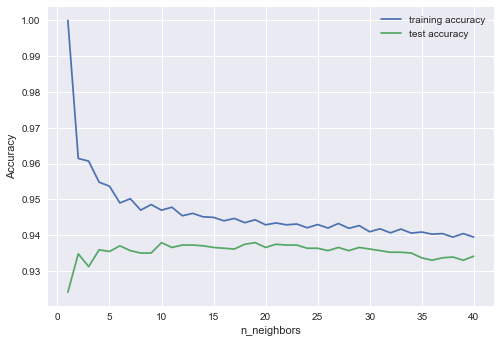

In [305]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 41)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [306]:
# Create kNN model, with n_neighbors=~20 (value inferred from figure above)
knn = KNeighborsClassifier(n_neighbors=20)

# Train the model
knn.fit(X_train, y_train)

# Get test set accuracy on trained model
print("Test set accuracy = {}".format(knn.score(X_test, y_test)))

Test set accuracy = 0.9365363128491621


## Voting Classifier (Ensemble Method)

In [307]:
# Required lib imports
from sklearn.ensemble import VotingClassifier

In [308]:
#create a dictionary of our models
estimators=[('knn', knn), ('rf', RandomForestModel)]

#create our voting classifier, inputting our models
voltingClssf = VotingClassifier(estimators, voting='hard')

# Train the model
voltingClssf.fit(X_train, y_train)

# Get test set accuracy on trained model
print("Test set accuracy = {}".format(voltingClssf.score(X_test, y_test)))

Test set accuracy = 0.9456983240223463


# Conclusions

- Most interenting lesson learnd from the "Investigacion Corta 2" using the HTRU2 Data Set [1], is how a fine-tuned dataset can benefit the algorithm's accuracy no matter the method/model used.
- The HTRU2 Data Set [1] is so fined-tuned that even when using a sub sets of the provided features, ~90% accuracy levels where accomplished.
- Moreover, it was noticed how simple methods resulted into almost the same accuracy as more complex methods did using less computational resources and doing the job quicker.

As a final experiment the analysis is going to be performed using a "Linear Regression" model in order to study the behavior of the HTRU2 dataset against the simplest model.

In [309]:
# Required lib imports
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("Test set score using dm-snr feature set: {:.2f}".format(lr.score(X_test, y_test)))

# update features array to both integrated-pulse-profile and dm-snr inputs
features = all_inputs
X_train, X_test, y_train, y_test = train_test_split(features, labels.values.ravel(), random_state=100)

lr = LinearRegression().fit(X_train, y_train)
print("Test set score using full feature set: {:.2f}".format(lr.score(X_test, y_test)))

Test set score using dm-snr feature set: 0.25
Test set score using full feature set: 0.70


- A 70% accuracy was accomplished by using a simple linear regression model. In this case, due to the simplicity of the model, the less features used the more penalty in accuracy terms.